In [1]:
import pyreadstat
import statsmodels.api as sm
import pandas as pd
df, meta = pyreadstat.read_sav(r'D:\wechat\WeChat Files\wxid_1lqbllxk3eee22\FileStorage\File\2024-03\42a6cc09d99e766e5f109bf67515a1d6_0f90cea286af8dda325fd79e24918644_8\合并后题项+总分.sav')

In [295]:
df.isnull().sum().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Columns: 173 entries, 序号 to T3攻击总分
dtypes: float64(168), object(5)
memory usage: 209.6+ KB


In [6]:
date = df[['家庭经济均分','T1家庭总分','T1逆反总分','T1攻击总分','T2家庭总分','T2逆反总分','T2攻击总分','T3家庭总分','T3逆反总分','T3攻击总分']]

In [7]:
date.head(5)

,家庭经济均分,T1家庭总分,T1逆反总分,T1攻击总分,T2家庭总分,T2逆反总分,T2攻击总分,T3家庭总分,T3逆反总分,T3攻击总分
0,1.25,40.0,38.0,27.0,41.0,23.0,25.0,42.0,26.0,20.0
1,2.25,43.0,28.0,25.0,44.0,35.0,27.0,43.0,28.0,24.0
2,1.00,40.0,28.0,33.0,49.0,32.0,41.0,47.0,20.0,36.0
3,1.00,44.0,32.0,31.0,42.0,31.0,36.0,42.0,33.0,36.0
4,2.00,45.0,33.0,36.0,40.0,28.0,36.0,45.0,29.0,26.0


In [8]:
x_lagged = sm.tsa.lagmat(date["T1家庭总分"], maxlag=1, trim='both')
# 合并数据
dat = pd.concat([date["T1攻击总分"], pd.DataFrame(x_lagged)], axis=1)
dat = dat.dropna()

# 拟合模型
model = sm.OLS(dat.iloc[:, 0], sm.add_constant(dat.iloc[:, 1:]))
result = model.fit()

In [9]:
date.columns

Index(['家庭经济均分', 'T1家庭总分', 'T1逆反总分', 'T1攻击总分', 'T2家庭总分', 'T2逆反总分', 'T2攻击总分',
       'T3家庭总分', 'T3逆反总分', 'T3攻击总分'],
      dtype='object')

In [82]:
import pandas as pd

# 示例数据
datafrown = date_g  # 替换为您的数据

# Min-Max归一化
datafrown_min_max = (datafrown - datafrown.min()) / (datafrown.max() - datafrown.min())

# Z-score归一化
datafrown_z_score = (datafrown - datafrown.mean()) / datafrown.std()

# 打印归一化后的数据
print("Min-Max归一化后的数据：")
print(datafrown_min_max)

print("\nZ-score归一化后的数据：")
print(datafrown_z_score)


Min-Max归一化后的数据：
     家庭经济均分    T1家庭总分    T1逆反总分    T1攻击总分    T2家庭总分    T2逆反总分    T2攻击总分  \
0      0.00  0.263158  0.714286  0.352941  0.285714  0.266667  0.448276   
1      0.25  0.473684  0.500000  0.352941  0.428571  0.566667  0.448276   
2      0.00  0.473684  0.607143  0.500000  0.714286  0.566667  0.793103   
3      0.00  0.578947  0.642857  0.470588  0.500000  0.566667  0.655172   
4      0.25  0.526316  0.714286  0.558824  0.428571  0.433333  0.689655   
..      ...       ...       ...       ...       ...       ...       ...   
150    0.00  0.473684  0.357143  0.323529  0.357143  0.233333  0.551724   
151    0.25  0.263158  0.321429  0.205882  0.000000  0.166667  0.413793   
152    0.00  0.368421  0.000000  0.029412  0.285714  0.100000  0.000000   
153    0.25  0.473684  0.464286  0.470588  0.500000  0.266667  0.551724   
154    0.25  0.526316  0.535714  0.529412  0.500000  0.600000  0.413793   

     T3家庭总分   T3逆反总分    T3攻击总分  
0      0.40  0.37500  0.181818  
1      0.40  0.40

155

In [13]:
date[date.columns[[1,2]]]

,T1家庭总分,T1逆反总分
0,40.0,38.0
1,43.0,28.0
2,40.0,28.0
3,44.0,32.0
4,45.0,33.0
...,...,...
150,46.0,18.0
151,42.0,20.0
152,45.0,11.0
153,45.0,24.0


In [520]:
import semopy
import pandas as pd

# 定义路径方程
model = '''
T2家庭总分 ~ T1家庭总分
T3家庭总分 ~ T2家庭总分

T2攻击总分 ~ T1攻击总分
T3攻击总分 ~ T2攻击总分

T2攻击总分 ~  T1家庭总分
T3攻击总分 ~  T2家庭总分

T1家庭总分 ~  T1攻击总分
T3家庭总分 ~  T3攻击总分
'''

# 拟合模型
mod = semopy.Model(model,mimic_lavaan=True)
fit = mod.fit(date_2)
# 输出结果
# print(fit.summary())

In [521]:
stats = semopy.calc_stats(mod)
print(stats.T)

                    Value
DoF              8.000000
DoF Baseline    16.000000
chi2            17.388463
chi2 p-value     0.026309
chi2 Baseline  158.294619
CFI              0.934021
GFI              0.890151
AGFI             0.780303
NFI              0.890151
TLI              0.868042
RMSEA            0.087296
AIC             25.775633
BIC             65.340159
LogLik           0.112184


In [523]:
mod.inspect(std_est=True).iloc[:8]

,lval,op,rval,Estimate,Est. Std,Std. Err,z-value,p-value
0,T2家庭总分,~,T1家庭总分,0.264352,0.327175,0.061327,4.310528,1.628649e-05
1,T3家庭总分,~,T2家庭总分,0.513720,0.398883,0.094667,5.426586,5.744209e-08
2,T3家庭总分,~,T3攻击总分,-0.054840,-0.090567,0.044509,-1.232111,2.179077e-01
3,T2攻击总分,~,T1攻击总分,0.465902,0.496461,0.066653,6.989970,2.749356e-12
4,T2攻击总分,~,T1家庭总分,0.087747,0.055435,0.112424,0.780499,4.350974e-01
5,T3攻击总分,~,T2攻击总分,0.564342,0.519801,0.074404,7.584834,3.330669e-14
6,T3攻击总分,~,T2家庭总分,0.103450,0.048638,0.145762,0.709720,4.778777e-01
7,T1家庭总分,~,T1攻击总分,-0.099846,-0.168411,0.046940,-2.127084,3.341311e-02


In [500]:
import semopy
import pandas as pd

# 定义路径方程
model_2 = '''
# 定义路径方程
T2家庭总分 ~ beta1 * T1家庭总分
T3家庭总分 ~ beta2 * T2家庭总分

T2逆反总分 ~ beta3 * T1逆反总分
T3逆反总分 ~ beta4 * T2逆反总分

T2攻击总分 ~ beta5 * T1攻击总分
T3攻击总分 ~ beta6 * T2攻击总分

T2逆反总分 ~ beta7 * T1家庭总分
T3逆反总分 ~ beta8 * T2家庭总分

T2攻击总分 ~ beta9 * T1逆反总分
T3攻击总分 ~ beta10 * T2逆反总分

T1家庭总分 ~  T1逆反总分
T1逆反总分 ~  T1攻击总分
T1家庭总分 ~  T1攻击总分

T3家庭总分 ~  T3攻击总分
T3家庭总分 ~  T3逆反总分
T3逆反总分 ~  T3攻击总分
'''

# 拟合模型
mod_2 = semopy.Model(model_2,mimic_lavaan=True)
fit_2 = mod_2.fit(data=date_2,clean_slate=True)
# 输出结果
print(fit_2)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.304
Number of iterations: 57
Params: 0.296 0.406 -0.016 -0.048 0.802 0.291 0.614 -0.117 0.462 0.295 0.229 0.489 0.138 -0.058 -0.054 0.714 17.804 35.405 12.009 39.257 31.519 20.263 45.627 34.489


In [489]:
mod_2.inspect(std_est=True)

,lval,op,rval,Estimate,Est. Std,Std. Err,z-value,p-value
0,T2家庭总分,~,T1家庭总分,0.295706,0.344446,0.064737,4.567840,4.927758e-06
1,T3家庭总分,~,T2家庭总分,0.405713,0.313201,0.098088,4.136225,3.530667e-05
2,T3家庭总分,~,T3攻击总分,-0.016099,-0.026703,0.055232,-0.291472,7.706904e-01
3,T3家庭总分,~,T3逆反总分,-0.048137,-0.094163,0.046887,-1.026657,3.045820e-01
4,T2逆反总分,~,T1逆反总分,0.802298,0.766836,0.056037,14.317382,0.000000e+00
5,T2逆反总分,~,T1家庭总分,0.291227,0.146345,0.106584,2.732358,6.288269e-03
6,T3逆反总分,~,T2逆反总分,0.613551,0.561270,0.057911,10.594660,0.000000e+00
7,T3逆反总分,~,T2家庭总分,-0.116530,-0.045988,0.127811,-0.911730,3.619109e-01
8,T3逆反总分,~,T3攻击总分,0.462195,0.391919,0.062483,7.397140,1.392220e-13
9,T2攻击总分,~,T1攻击总分,0.295469,0.315472,0.088051,3.355671,7.917263e-04


In [487]:
stats = semopy.calc_stats(mod_2)
stats.T

,Value
DoF,21.000000
DoF Baseline,37.000000
chi2,47.061676
chi2 p-value,0.000921
chi2 Baseline,572.660717
CFI,0.951347
GFI,0.917819
AGFI,0.855205
NFI,0.917819
TLI,0.914277


In [488]:
print(fit_2)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.304
Number of iterations: 57
Params: 0.296 0.406 -0.016 -0.048 0.802 0.291 0.614 -0.117 0.462 0.295 0.229 0.489 0.138 -0.058 -0.054 0.714 17.804 35.405 12.009 39.257 31.519 20.263 45.627 34.489


In [21]:
import matplotlib.pyplot as plt

In [22]:
date_g = date.copy()

In [23]:
# date_g["T1家庭总分"] =  date_g["T1家庭总分"] + date_g["T1逆反总分"] - date_g["T1逆反总分"].median()
# date_g["T2家庭总分"] =  date_g["T2家庭总分"] + date_g["T2逆反总分"] - date_g["T2逆反总分"].median()
# date_g["T3家庭总分"] =  date_g["T3家庭总分"] + date_g["T3逆反总分"] - date_g["T3逆反总分"].median()

In [24]:
da =  date_g["T3攻击总分"] + date_g["T2逆反总分"] + date_g["T1家庭总分"]
db =  date_g["T1攻击总分"] + date_g["T3逆反总分"] + date_g["T2家庭总分"]
dc =  date_g["T2攻击总分"] + date_g["T1逆反总分"] + date_g["T3家庭总分"]

In [25]:
da = da/3
db = db/3
dc = dc/3

In [26]:
date_g["T1家庭总分"] = (date_g["T1家庭总分"] + da)/2 
date_g["T1攻击总分"] = (date_g["T1攻击总分"] + db)/2 
date_g["T1逆反总分"] = (date_g["T1逆反总分"] + dc)/2 
date_g["T2家庭总分"] = (date_g["T2家庭总分"] + db)/2 
date_g["T2攻击总分"] = (date_g["T2攻击总分"] + dc)/2 
date_g["T2逆反总分"] = (date_g["T2逆反总分"] + da)/2 
date_g["T3家庭总分"] = (date_g["T3家庭总分"] + dc)/2 
date_g["T3攻击总分"] = (date_g["T3攻击总分"] + da)/2 
date_g["T3逆反总分"] = (date_g["T3逆反总分"] + db)/2 

In [27]:
date_g = date_g.round(0)

In [28]:
df[['家庭经济均分','T1家庭总分','T1逆反总分','T1攻击总分','T2家庭总分','T2逆反总分','T2攻击总分','T3家庭总分','T3逆反总分','T3攻击总分']] = date_g[['家庭经济均分','T1家庭总分','T1逆反总分','T1攻击总分','T2家庭总分','T2逆反总分','T2攻击总分','T3家庭总分','T3逆反总分','T3攻击总分']]

In [397]:
df.to_csv(r"C:\Users\lll23\Desktop\应用\数据分析\ddd\aaa.csv")

In [533]:
import numpy as np
from scipy.stats import norm

# 原始数据
X = date_2["T3家庭总分"]
M = date_2["T3逆反总分"]
Y = date_2["T3攻击总分"]

# 计算总效应
total_effect = np.corrcoef(X, Y)[0, 1]

# 计算中介效应
indirect_effect = np.corrcoef(X, M)[0, 1] * np.corrcoef(M, Y)[0, 1]

# 计算中介效应的Bootstrap检验
n_bootstrap = 1000
bootstrap_indirect_effects = []
for _ in range(n_bootstrap):
    X_bs = np.random.choice(X, size=len(X), replace=True)
    M_bs = np.random.choice(M, size=len(M), replace=True)
    Y_bs = np.random.choice(Y, size=len(Y), replace=True)
    indirect_effect_bs = np.corrcoef(X_bs, M_bs)[0, 1] * np.corrcoef(M_bs, Y_bs)[0, 1]
    bootstrap_indirect_effects.append(indirect_effect_bs)

# 计算p值
p_value = np.mean(np.abs(bootstrap_indirect_effects) >= np.abs(indirect_effect))

# 计算置信区间
conf_interval = np.percentile(bootstrap_indirect_effects, [2.5, 97.5])

print("总效应：", total_effect)
print("中介效应：", indirect_effect)
print("Bootstrap检验p值：", p_value)
print("Bootstrap检验置信区间：", conf_interval)


总效应： -0.08324873652251157
中介效应： -0.07862851347918949
Bootstrap检验p值： 0.0
Bootstrap检验置信区间： [-0.01351596  0.01410062]


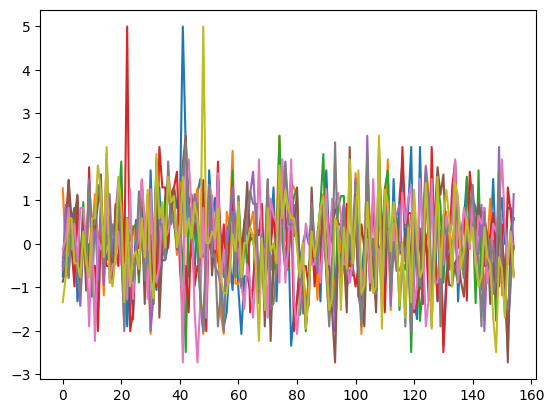

In [291]:
import matplotlib.pyplot as plt
for i in range(1,10):
    plt.plot(range(155),cc.iloc[:,i])

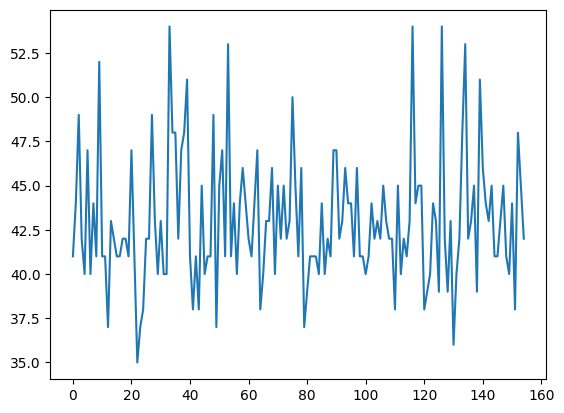

In [135]:
plt.plot(range(155),date.iloc[:,4])

In [128]:
date

,家庭经济均分,T1家庭总分,T1逆反总分,T1攻击总分,T2家庭总分,T2逆反总分,T2攻击总分,T3家庭总分,T3逆反总分,T3攻击总分
0,1.25,40.0,38.0,27.0,41.0,23.0,25.0,42.0,26.0,20.0
1,2.25,43.0,28.0,25.0,44.0,35.0,27.0,43.0,28.0,24.0
2,1.00,40.0,28.0,33.0,49.0,32.0,41.0,47.0,20.0,36.0
3,1.00,44.0,32.0,31.0,42.0,31.0,36.0,42.0,33.0,36.0
4,2.00,45.0,33.0,36.0,40.0,28.0,36.0,45.0,29.0,26.0
...,...,...,...,...,...,...,...,...,...,...
150,1.00,46.0,18.0,27.0,44.0,19.0,32.0,54.0,18.0,25.0
151,1.50,42.0,20.0,23.0,38.0,19.0,27.0,45.0,15.0,17.0
152,1.00,45.0,11.0,12.0,48.0,11.0,12.0,41.0,12.0,28.0
153,1.75,45.0,24.0,33.0,45.0,18.0,33.0,44.0,22.0,33.0


In [214]:
import semopy
import pandas as pd

# 定义路径方程
model = '''
T2家庭总分 ~ T1家庭总分
T3家庭总分 ~ T2家庭总分

T2攻击总分 ~ T1攻击总分
T3攻击总分 ~ T2攻击总分

T2攻击总分 ~  T1家庭总分
T3攻击总分 ~  T2家庭总分

T1家庭总分 ~~  T1攻击总分
T3家庭总分 ~~  T3攻击总分
'''

# 拟合模型
mod = semopy.Model(model,mimic_lavaan=True)
fit = mod.fit(data)
# 输出结果
# print(fit.summary())

In [511]:
stats = semopy.calc_stats(mod)
stats.T


,Value
DoF,8.000000
DoF Baseline,16.000000
chi2,17.388463
chi2 p-value,0.026309
chi2 Baseline,158.294619
CFI,0.934021
GFI,0.890151
AGFI,0.780303
NFI,0.890151
TLI,0.868042


In [512]:
17.388/8

2.1735

In [310]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# 创建一个示例DataFrame
data = date
# 定义一个函数，将每列数据映射为正态分布
def map_to_normal(column):
    rank_percentiles = (column.rank() - 1) / len(column)
    mapped_data = norm.ppf(rank_percentiles)
    return mapped_data

# 使用 apply 方法批量应用函数到每列数据
mapped_data = data.apply(map_to_normal)
# 打印映射后的数据
# print(mapped_data
# 定义替换函数
def replace_min(column):
    min_value = column.min()  # 获取列的最小值
    column.replace(min_value, 3, inplace=True)  # 将最小值替换为0
    return column

# 对每列应用替换函数
# cc = mapped_data.replace(-np.inf,5)
# cc = cc.apply(replace_min)
mod = semopy.Model(model,mimic_lavaan=True)
fit = mod.fit(cc)
stats = semopy.calc_stats(mod)
print(stats.T)

                    Value
DoF             21.000000
DoF Baseline    37.000000
chi2            52.418051
chi2 p-value     0.000167
chi2 Baseline  564.562750
CFI              0.940447
GFI              0.907153
AGFI             0.836412
NFI              0.907153
TLI              0.895073
RMSEA            0.098564
AIC             47.323638
BIC            120.365841
LogLik           0.338181


In [315]:
mapped_data

家庭经济均分    2.486429
T1家庭总分    2.229112
T1逆反总分    2.486429
T1攻击总分    2.486429
T2家庭总分    2.229112
T2逆反总分    2.486429
T2攻击总分    2.486429
T3家庭总分    1.946348
T3逆反总分    2.338625
T3攻击总分    2.486429
dtype: float64

In [307]:
# mod.inspect(std_est=True)[:16]

In [316]:
inf_positions = np.argwhere(np.isneginf(mapped_data.values))

In [317]:
for pos in inf_positions:
    row, col = pos
    print(f"Position ({row}, {col}) has value -inf: {df.iat[row, col]}")

Position (22, 4) has value -inf: 5043
Position (41, 1) has value -inf: 546
Position (48, 9) has value -inf: 1.0


In [503]:
date_2 = date.copy()
date_2.iloc[22,4] = 54
date_2.iloc[41,1] = 54
date_2.iloc[48,9] = 56
date_2.iloc[1,3] = 34
date_2.iloc[6,2] = 31

In [504]:
mmm = []
for i in range(len(date_2)):
    for j in range(1,10):
        date_3 = date_2.copy()
        if date_3.iloc[i,j]<=30:
            date_3.iloc[i,j] = date_3.iloc[i,j]+10
        else:
            date_3.iloc[i,j] = date_3.iloc[i,j]-10
        mod3 = semopy.Model(model_2,mimic_lavaan=True)
        mod3.fit(date_3)
        mod2 = semopy.Model(model_2,mimic_lavaan=True)
        mod2.fit(date_2)
        d2 = semopy.calc_stats(mod2).T.iloc[10][0]
        d3 = semopy.calc_stats(mod3).T.iloc[10][0]
        mod4 = semopy.Model(model,mimic_lavaan=True)
        mod4.fit(date_3)
        mod5 = semopy.Model(model,mimic_lavaan=True)
        mod5.fit(date_2)
        d4 = semopy.calc_stats(mod4).T.iloc[10][0]
        d5 = semopy.calc_stats(mod5).T.iloc[10][0]
        if d2<0.09 and d5<0.09:
           print(d2)
           break
        elif (d2-d3)> 0.001 and (d5-d4)>0.001:
           date_2 = date_3
           mmm.append([i,j])   
           print(1)
    if d2<0.09 and d5<0.09:
       break

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0.08968348648003126


In [515]:
47/21

2.238095238095238

In [505]:
semopy.calc_stats(mod2).T

,Value
DoF,21.000000
DoF Baseline,37.000000
chi2,47.011475
chi2 p-value,0.000936
chi2 Baseline,576.403208
CFI,0.951777
GFI,0.918440
AGFI,0.856299
NFI,0.918440
TLI,0.915036


In [506]:
mmm.append([22,4])
mmm.append([41,1])
mmm.append([48,9])
mmm.append([1,3])
mmm.append([6,2]) 

In [507]:
mod2.inspect(std_est=True).iloc[:16]

,lval,op,rval,Estimate,Est. Std,Std. Err,z-value,p-value
0,T2家庭总分,~,T1家庭总分,0.264353,0.327497,0.061260,4.315288,1.593947e-05
1,T3家庭总分,~,T2家庭总分,0.504496,0.391851,0.094610,5.332370,9.693896e-08
2,T3家庭总分,~,T3攻击总分,-0.029692,-0.048476,0.053586,-0.554094,5.795146e-01
3,T3家庭总分,~,T3逆反总分,-0.036139,-0.069533,0.045608,-0.792382,4.281379e-01
4,T2逆反总分,~,T1逆反总分,0.810444,0.771183,0.055572,14.583700,0.000000e+00
5,T2逆反总分,~,T1家庭总分,0.241106,0.131303,0.097101,2.483039,1.302670e-02
6,T3逆反总分,~,T2逆反总分,0.608532,0.558838,0.058263,10.444536,0.000000e+00
7,T3逆反总分,~,T2家庭总分,-0.183882,-0.074231,0.127187,-1.445759,1.482449e-01
8,T3逆反总分,~,T3攻击总分,0.457568,0.388269,0.063061,7.255979,3.987921e-13
9,T2攻击总分,~,T1攻击总分,0.318215,0.338957,0.089763,3.545041,3.925514e-04


In [532]:
date_2.to_csv(r"C:\Users\lll23\Desktop\应用\数据分析\ddd\bbb.csv")